Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/praktikumML/praktikum11/data/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Data Preparation

In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


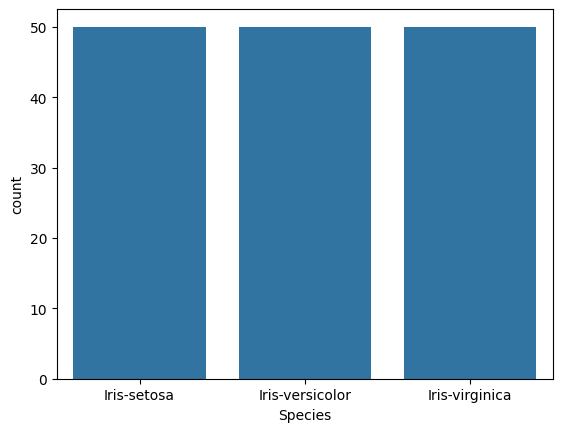

In [ ]:
sns.countplot(x='Species', data=df)
plt.show()

Pemilihan Fitur

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["SpeciesEncoded"] = le.fit_transform(df["Species"])

Menentukan Jumlah Cluster (K) dengan Elbow Method

In [ ]:
# Fitur untuk clustering
X = df.drop(["Species", "SpeciesEncoded"], axis=1)

(array([49.,  8., 41., 29., 23.]),
 array([0.1 , 0.58, 1.06, 1.54, 2.02, 2.5 ]),
 <BarContainer object of 5 artists>)

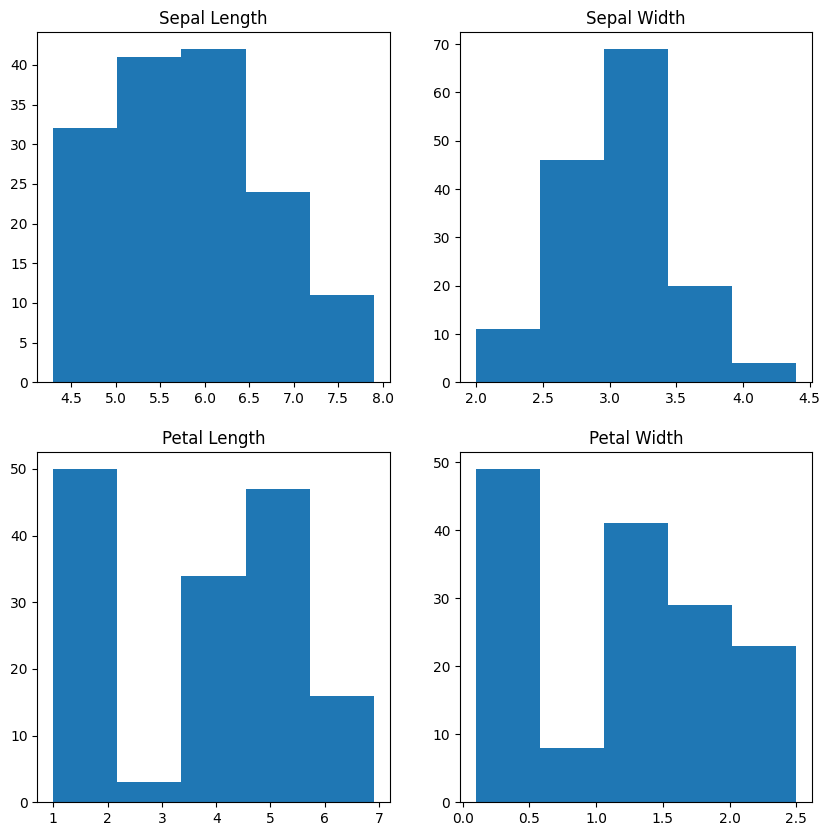

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

#Histogram 1: Sepal Length
ax[0, 0].set_title("Sepal Length")
ax[0, 0].hist(X["SepalLengthCm"], bins=5)

#Histogram 2: Sepal Width
ax[0, 1].set_title("Sepal Width")
ax[0, 1].hist(X["SepalWidthCm"], bins=5)

#Histogram 3: Petal Length
ax[1, 0].set_title("Petal Length")
ax[1, 0].hist(X["PetalLengthCm"], bins=5)

#Histogram 4: Petal Width
ax[1, 1].set_title("Petal Width")
ax[1, 1].hist(X['PetalWidthCm'], bins=5)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Re-initialize X from the original DataFrame: 'df'
# This ensures X is a DataFrame with named columns for indexing before scaling
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Now apply the scaling
X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

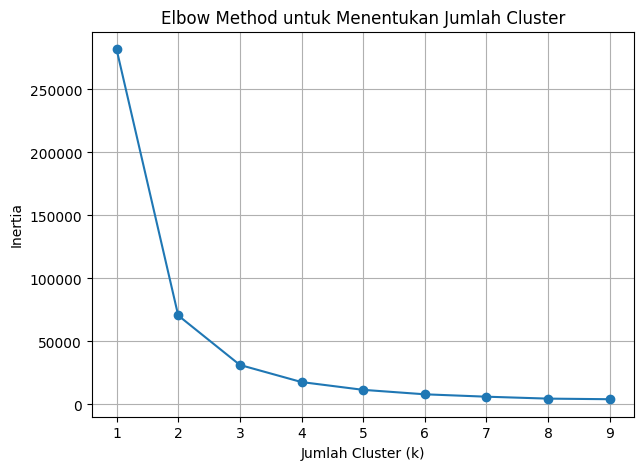

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

Membangun model k-means

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,  # Karena dataset Iris ada 3 spesies
    init="k-means++",
    random_state=42,
    n_init='auto' # Tambahan: disarankan untuk versi sklearn terbaru
)

In [ ]:
# kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# labels = kmeans.predict(X)

In [ ]:
# df['Cluster'] = labels

In [ ]:
df["Cluster"] = kmeans.fit_predict(X)

print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [1 2 0]


Evaluasi Kualitas Clustering

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df["Cluster"])
print("\n===== SILHOUETTE SCORE =====")
print("Silhouette Score:", sil_score)


===== SILHOUETTE SCORE =====
Silhouette Score: 0.4787241921049546


Confusion Matrix (Perbandingan dengan Label Asli)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("\n===== CONFUSION MATRIX =====")
cm = confusion_matrix(df["SpeciesEncoded"], df["Cluster"])
print(cm)


===== CONFUSION MATRIX =====
[[ 0 32 18]
 [46  0  4]
 [50  0  0]]


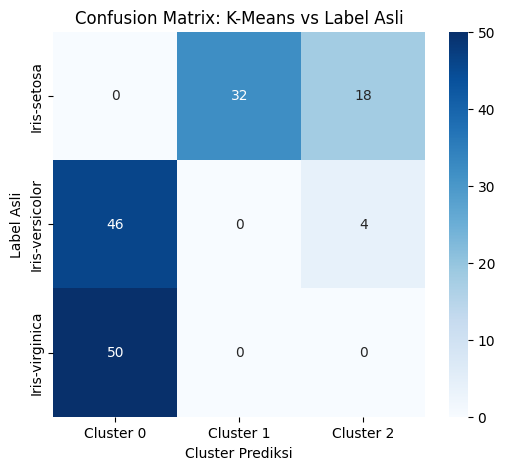

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
    yticklabels=le.classes_
)
plt.title("Confusion Matrix: K-Means vs Label Asli")
plt.xlabel("Cluster Prediksi")
plt.ylabel("Label Asli")
plt.show()

2D dan 3D Visualisasi Hasil Model K-Means

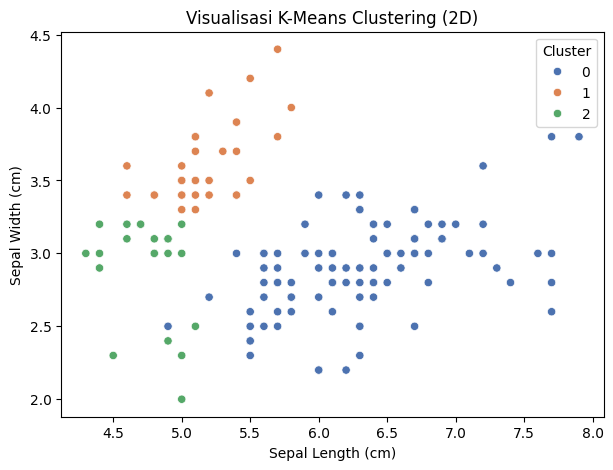

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Cluster"],
    palette="deep"
)
plt.title("Visualisasi K-Means Clustering (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

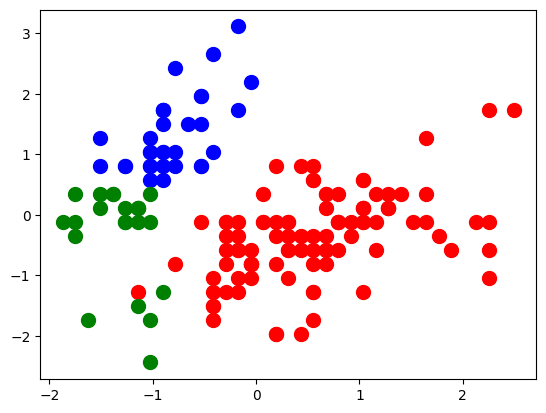

In [ ]:
#Visualising the clusters
plt.scatter(X[df['Cluster'] == 0, 0], X[df['Cluster'] == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[df['Cluster'] == 1, 0], X[df['Cluster'] == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[df['Cluster'] == 2, 0], X[df['Cluster'] == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


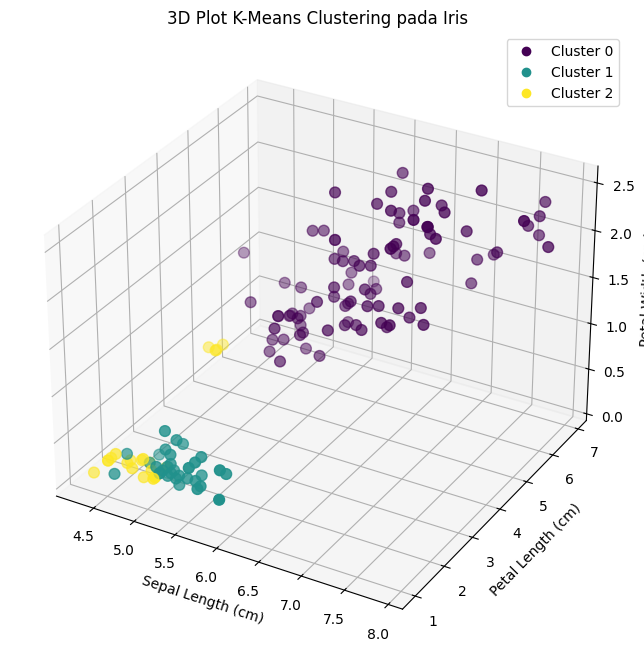

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df["SepalLengthCm"],
    df["PetalLengthCm"],
    df["PetalWidthCm"],
    c=df["Cluster"],
    s=60
)

ax.set_title("3D Plot K-Means Clustering pada Iris")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Petal Width (cm)")

# Legend cluster
legend_labels = [f"Cluster {i}" for i in range(3)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()